<a href="https://colab.research.google.com/github/Prikat25/DL_636/blob/main/633003352_DL_assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

Epoch 1/5
469/469 [==============================] - 9s 9ms/step - loss: 0.6164 - accuracy: 0.8321
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2883 - accuracy: 0.9172
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.9288
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.9350
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9377
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4586 - accuracy: 0.8799
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.9317
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2001 - accuracy: 0.9420
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1727 - accuracy: 0.9493
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1518 - accuracy: 0.9551
Epoch 1/5


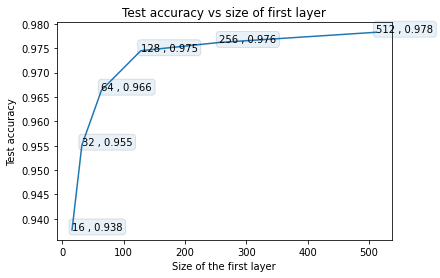

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
# Create a dictionary to store the test accuracy for different sizes of the first layer
test_accuracy = {}
for size in [16, 32, 64, 128, 256, 512]:
  model_name = "model_" + str(size)
  model_name = keras.Sequential([
      layers.Dense(size, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model_name.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  model_name.fit(train_images, train_labels, epochs=5, batch_size=128);
  test_loss, test_acc = model_name.evaluate(test_images, test_labels)
  # Add the test accuracy to the dictionary
  test_accuracy[size] = test_acc

# Plot the results
plt.plot(list(test_accuracy.keys()), list(test_accuracy.values()))
for i in list(test_accuracy.keys()):
  plt.text(i, test_accuracy[i], str(i) + ' , ' + str(round(test_accuracy[i],3)), bbox=dict(boxstyle="round", alpha=0.1))
plt.title('Test accuracy vs size of first layer')
plt.xlabel('Size of the first layer')
plt.ylabel('Test accuracy')
plt.show();

In [4]:
print(test_accuracy)

{16: 0.9376999735832214, 32: 0.9550999999046326, 64: 0.9664000272750854, 128: 0.9745000004768372, 256: 0.9761999845504761, 512: 0.9782999753952026}


I'm adding layer 1 with 512 neurons for size 2
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2530 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1021 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0486 - accuracy: 0.9852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9778
I'm adding layer 1 with 512 neurons for size 3
I'm adding layer 2 with 128 neurons for size 3
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2325 - accuracy: 0.9296
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9733
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0565 - accuracy: 0.9822
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - 

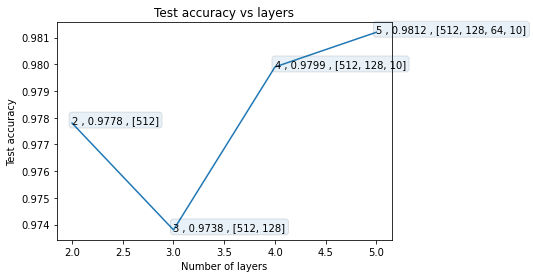

In [13]:
from keras.layers import Dense
# Create a dictionary to store the test accuracy for different sizes of the first layer
test_accuracy_2 = {}
layers = {2: [512], 3: [512, 128], 4:[512, 128, 10], 5:[512, 128, 64, 10]}
for size in list(layers.keys()):
  model_name = "model_" + str(size)
  model_name = keras.Sequential()
  layer_n = layers[size]
  for i in range(0, len(layer_n)):
    neurons = layer_n[i]
    print("I'm adding layer " + str(i+1) + " with " + str(neurons) + " neurons for size " + str(size))
    model_name.add(Dense(neurons, activation='relu'))
  model_name.add(Dense(10, activation="softmax"))
  model_name.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  model_name.fit(train_images, train_labels, epochs=5, batch_size=128);
  test_loss, test_acc_2 = model_name.evaluate(test_images, test_labels)
  # Add the test accuracy to the dictionary
  test_accuracy_2[size] = test_acc_2

# Plot the results
plt.plot(list(test_accuracy_2.keys()), list(test_accuracy_2.values()))
for i in list(test_accuracy_2.keys()):
  plt.text(i, test_accuracy_2[i], str(i) + ' , ' + str(round(test_accuracy_2[i],4)) + ' , ' + str(layers[i]),
           bbox=dict(boxstyle="round", alpha=0.1))
plt.title('Test accuracy vs layers')
plt.xlabel('Number of layers')
plt.ylabel('Test accuracy')
plt.show();

In [15]:
print(test_accuracy_2)

{2: 0.9778000116348267, 3: 0.973800003528595, 4: 0.9799000024795532, 5: 0.9811999797821045}
